## Please solve the problem using the graphical method. 

- max z = 5x1 + 4x2

**s. t.**

- 6x1 + 4x2 ≤ 24
- x1 + 2x2 ≤ 6
- −x1 + x2 ≤ 1
- x2 ≤ 2
- x1, x2 ≥ 0

**Linear programming is a set of practices used in mathematical programming, often referred to as mathematical optimization, to solve systems of linear equations and inequalities while maximizing or minimizing some linear function.**

**It is essential because you have a system of linear equations and inequalities, and such systems often have many possible solutions. Linear programming is a set of mathematical and computational tools that allows you to find a particular solution to this system that corresponds to the maximum or minimum of some other linear function.**

**Even though there are many libraries available within the python ecosystem to solve a set of linear equations, I am using the pulp library to solve this problem.**

**Several free Python libraries are specialized to interact with linear or mixed-integer linear programming solvers:**
- `SciPy Optimization and Root Finding`
- `PuLP`
- `Pyomo`
- `CVXOPT`

`PuLP` is a free open source software written in Python. It is used to describe optimisation problems as mathematical models. `PuLP` can then call any of numerous external LP solvers (CBC, GLPK, CPLEX, Gurobi etc) to solve this model and then use python commands to manipulate and display the solution.

In [22]:
from pulp import *

In [12]:
# Create the model
model = LpProblem(name="Homework 2_2", sense=LpMaximize)

C:\Users\dell\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [13]:
# Initialize the decision variables
x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)

In [14]:
# Add the constraints to the model
model += (6 * x1+ 4 * x2 <= 24, "1_constraint")
model += (1 * x1+ 2 * x2 <= 6, "2_constraint")
model += (-1 * x1 + 1* x2 <= 1, "3_constraint")
model += (0 * x1 + 1 * x2 <= 2, "4_constraint")

In [15]:
# Add the objective function to the model
obj_func = 5 * x1 + 4 * x2
model += obj_func

In [16]:
# Add the objective function to the model
model += lpSum([5 * x1, 4 * x2])

C:\Users\dell\anaconda3\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [17]:
model

Homework_2_2:
MAXIMIZE
5*x1 + 4*x2 + 0
SUBJECT TO
1_constraint: 6 x1 + 4 x2 <= 24

2_constraint: x1 + 2 x2 <= 6

3_constraint: - x1 + x2 <= 1

4_constraint: x2 <= 2

VARIABLES
x1 Continuous
x2 Continuous

In [18]:
solution = model.solve()

In [19]:
print(f"solution: {model.status}, {LpStatus[model.status]}")

solution: 1, Optimal


In [20]:
print(f"objective: {model.objective.value()}")

objective: 21.0


In [23]:
print("The optimal value of the objective function is = ", value(model.objective))

The optimal value of the objective function is =  21.0


In [12]:
for i in model.variables():
    print(f"{i.name}: {i.value()}")

x1: 3.0
x2: 1.5


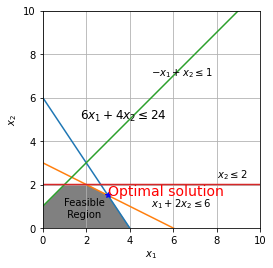

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plot the lines defining the constraints
x = np.linspace(0, 16, 2000)
y1 = 6 - 1.5 * x                         
y2 = 3 - 0.5 * x                         
y3 = 1 + x                         
y4 = 2 + 0 * x  

# Make plot
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, 2*np.ones_like(y4))
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.text(1.7, 5, "$6x_1 + 4x_2 \leq 24$", size = 12)
plt.text(5, 1, "$x_1 + 2x_2 \leq 6$")
plt.text(5, 7, "$-x_1 + x_2 \leq 1$")
plt.text(8, 2.3, "$x_2 \leq 2$")
plt.plot([3],[1.5], 'b*', label = 'p')
plt.text(3,1.5, 'Optimal solution', color = 'red', size = 14)
plt.text(1.0, 0.5, 'Feasible \n Region')
plt.grid(True)

s = np.linspace(0,16,2000)
x,y = np.meshgrid(s,s)
plt.imshow( ((y<=2) & (4*y<=24-6*x) & (2*y<=6-1*x) & (y<=1*x+1)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.5);

If you evaluate the inequalities, you will see that python (actually, `numpy`) returns an array with `True`/`False` entries that `plt.imshow` does not understand. With `.astype(int)`, the entries are translated to 0/1's that `imshow` understands

Our solution lies somewhere in the grey feasible region in the graph above.

It has been proven that the minima and maxima of linear programming problems lie at the vertices of the feasible region. In this example, there are only 4 corners to our feasible region, so we can find the solutions for each corner to find our maximum.

An easier approach to plotting the feasible region is to have `matplotlib` compute the feasible region on its own (with you only providing the constraints) and then simply overlay the "constraint" lines on top.

The optimal point is marked with an **asterisk (3,1.5)**

Solution:

- $x_1$ : 3.0
- $x_2$ : 1.5

- z = 21.0

We have successfully calculated that the maximum value for  `z` is  21.0, when  $x_1$ is 3.0  and $x_2$ is 1.5. 

**This method of testing every vertex is only feasible for a small number of variables and constraints. As the numbers of constraints and variables increase, it becomes far more difficult to graph these problems and work out all the vertices.**